In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('meteorite-landings.csv')

In [21]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [30]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38177.000000,38177.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.352128,61.223343
std,16860.683030,5.749889e+05,27.181247,46.417171,80.860013
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.716670,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [24]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [25]:
df['year']

0        1880.0
1        1951.0
2        1952.0
3        1976.0
4        1902.0
          ...  
45711    1990.0
45712    1999.0
45713    1939.0
45714    2003.0
45715    1976.0
Name: year, Length: 45716, dtype: float64

In [26]:
df['year'] = pd.to_numeric(df['year'],errors='coerce')

In [27]:
df.loc[df['year'] < 860 | (df['year'] > 2016),'year'] = 0

In [28]:
#filter(reclong<=180 & reclong>=-180 & (reclat!=0 | reclong!=0)) # filter out weird locations

df.loc[(df['reclat'] == 0) & (df['reclong'] != 0),['reclat','reclong']] = [pd.NA,pd.NA]
df.loc[df['reclong'] <= 180 & (df['reclong'] >= -180)] = df


In [5]:
df['recclass'].unique()

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an', 'LL5',
       'CI1', 'L/LL4', 'Eucrite-mmict', 'CV3', 'Ureilite-an',
       'Stone-uncl', 'L3', 'Angrite', 'LL6', 'L4', 'Aubrite',
       'Iron, IIAB', 'Iron, IAB-sLL', 'Iron, ungrouped', 'CM2', 'OC',
       'Mesosiderite-A1', 'LL4', 'C2-ung', 'LL3.8', 'Howardite',
       'Eucrite-pmict', 'Diogenite', 'LL3.15', 'LL3.9', 'Iron, IAB-MG',
       'H/L3.9', 'Iron?', 'Eucrite', 'H4-an', 'L/LL6', 'Iron, IIIAB',
       'H/L4', 'H4-5', 'L3.7', 'LL3.4', 'Martian (chassignite)', 'EL6',
       'H3.8', 'H3-5', 'H5-6', 'Mesosiderite', 'H5-7', 'L3-6', 'H4-6',
       'Ureilite', 'Iron, IID', 'Mesosiderite-A3/4', 'CO3.3', 'H3',
       'EH3/4-an', 'Iron, IIE', 'L/LL5', 'H3.7', 'CBa', 'H4/5', 'H3/4',
       'H?', 'H3-6', 'L3.4', 'Iron, IAB-sHL', 'L3.7-6', 'EH7-an', 'Iron',
       'CR2', 'CO3.2', 'K3', 'L5/6', 'CK4', 'Iron, IIE-an', 'L3.6',
       'LL3.2', 'CO3.5', 'Lodran

In [7]:
df['fall'].unique()

array(['Fell', 'Found'], dtype=object)

Text(0.5, 0, 'Mass')

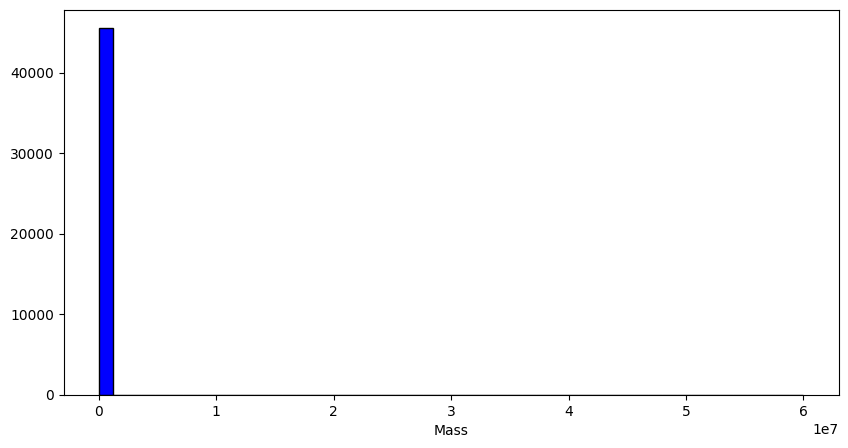

In [34]:
plt.figure(figsize=(10,5))
plt.hist(df['mass'],bins=50,color='blue',edgecolor='black')
plt.xlabel('Mass')


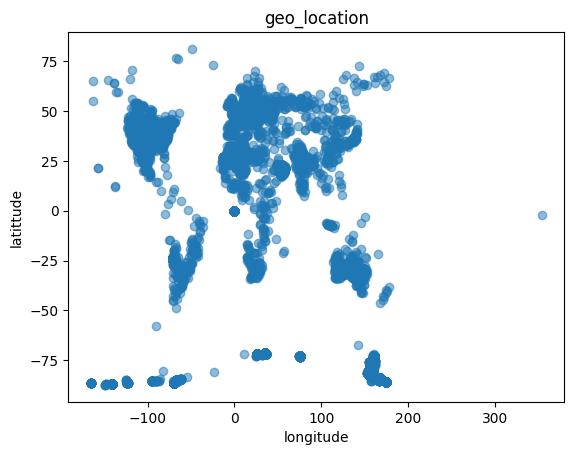

In [37]:
plt.scatter(df['reclong'],df['reclat'],alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latittude')
plt.title('geo_location')
plt.show()

In [42]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38177.000000,38177.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.352128,61.223343
std,16860.683030,5.749889e+05,27.181247,46.417171,80.860013
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.716670,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [39]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7539
reclong        7539
GeoLocation    7315
dtype: int64

In [41]:
df.loc[(df['year'] < 860) | (df['year'] > 2016), 'year'] = -df['year']


In [43]:
df.loc[(df['reclat'] == 0) & (df['reclong'] == 0), ['reclat', 'reclong']] = None

In [44]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,31963.000000,31963.000000
mean,26889.735104,1.327808e+04,1991.772189,-47.002666,73.125913
std,16860.683030,5.749889e+05,27.181247,47.051373,83.301272
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-79.683330,26.000000
50%,24261.500000,3.260000e+01,1998.000000,-72.000000,56.872250
75%,40656.750000,2.026000e+02,2003.000000,18.566675,159.392500
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330
